In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns    
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np



In [50]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [15]:
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/gulim.ttc").get_name()
rc('font', family=font_name)

In [16]:
main_data = pd.read_csv("./MainData.csv", encoding = 'euc-kr')
main_data.head()

,자치구명,층,임대면적,보증금,계약일,건축년도,임대건물명,경제활동인구,기준금리,전세가격비율,정책성향,아파트매매실거래지수,회사채수익률,소비자물가지수,통화량,광공업지수
0,영등포구,3.0,29.40,26200.0,2022-05-06,2016.0,다세대/연립,28310.0,0.5,65.0,1.0,175.55,3.63,107.56,"3,656.10",3.3
1,양천구,1.0,28.68,7000.0,2022-05-06,1989.0,단독/다가구,28310.0,0.5,65.0,1.0,175.55,3.63,107.56,"3,656.10",3.3
2,중랑구,3.0,31.05,19400.0,2022-05-06,2018.0,다세대/연립,28310.0,0.5,65.0,1.0,175.55,3.63,107.56,"3,656.10",3.3
3,서대문구,1.0,13.20,5000.0,2022-05-06,1997.0,단독/다가구,28310.0,0.5,65.0,1.0,175.55,3.63,107.56,"3,656.10",3.3
4,강남구,4.0,40.72,40950.0,2022-05-06,2016.0,다세대/연립,28310.0,0.5,65.0,1.0,175.55,3.63,107.56,"3,656.10",3.3


In [18]:
data = pd.read_excel("./부동산정책_수정.xlsx")
data.head()

,"도시계획, 주거계획, 주택시장, 토지 시계열","도시계획, 주거계획, 주택시장, 토지 시계열.1","도시계획, 주거계획, 주택시장, 토지 시계열.2","도시계획, 주거계획, 주택시장, 토지 시계열.3",Unnamed: 4,Unnamed: 5,Unnamed: 6
0,주제분류,날짜,제목,발간처,세금,실수요,공급
1,거시경제/재정 > 조세 > 국세,2022.05.09,부동산 시장 안정화를 위한 소득세법 시행령 개정 방향,기획재정부 세제실 재산세제과,-1,0,0
2,국토교통 > 부동산 > 주택시장,2022.01.12,공모·상장 활성화를 위한 리츠제도 개선방안,국토교통부 주택토지실 부동산산업과,-1,0,0
3,국토교통 > 부동산 > 주택시장,2021.12.28,2022년 국토교통부 업무계획,국토교통부 주택토지실 주택정책과,0,1,1
4,국토교통 > 도시·건축 > 도시계획,2021.11.04,도시개발사업의 공공성 강화 방안,국토교통부 국토도시실 도시활력지원과,1,0,0


## 데이터 전처리

### 변수별 결측치 확인

In [19]:
main_data.isna().sum()

자치구명          356
층             356
임대면적          356
보증금           356
계약일           356
건축년도          356
임대건물명         356
경제활동인구        356
기준금리          356
전세가격비율        356
정책성향          356
아파트매매실거래지수    356
회사채수익률        356
소비자물가지수       356
통화량           356
광공업지수         356
dtype: int64

#### 데이터를 불러 올 때, 356개의 NaN이 아래에 생성되어 제거

In [20]:
main_data = main_data.dropna()
main_data.isna().sum()

자치구명          0
층             0
임대면적          0
보증금           0
계약일           0
건축년도          0
임대건물명         0
경제활동인구        0
기준금리          0
전세가격비율        0
정책성향          0
아파트매매실거래지수    0
회사채수익률        0
소비자물가지수       0
통화량           0
광공업지수         0
dtype: int64

#### 전세 관련 정책에서 날짜 유형 가중치만 남기기

In [21]:
data.columns = data.iloc[0, :]
data = data.iloc[1:, [1, 4, 5,6]]
data.head()

,날짜,세금,실수요,공급
1,2022.05.09,-1,0,0
2,2022.01.12,-1,0,0
3,2021.12.28,0,1,1
4,2021.11.04,1,0,0
5,2021.09.15,-1,0,1


In [22]:
data = data.dropna().reset_index(drop = True)
data.isna().sum()

0
날짜     0
세금     0
실수요    0
공급     0
dtype: int64

### 계약 날짜에 따른 전세 정책법 법안 데이터 합치기

#### - 각 데이터의 날짜를 숫자로 바꿔주기

In [23]:
def data_transform1(date):
    return int(str(date).replace('-',''))
def data_transform2(date):
    return int(str(date).replace('.',''))

In [24]:
main_data['계약일'] = main_data['계약일'].map(data_transform1)
data['날짜'] = data['날짜'].map(data_transform2)

/Users/son/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 각 날짜 이전의 법안에 따른 가중치 * 카테고리 합산

In [27]:
legal_cat = pd.DataFrame({'계약일': range(min(data['날짜']), max(data['날짜']) + 1)})
legal_cat['세금'] = 0
legal_cat['실수요'] = 0
legal_cat['공급'] = 0

In [28]:
import tqdm
for i in tqdm.trange(legal_cat.shape[0]):
    temp_legal = data.loc[data['날짜'] <= legal_cat['계약일'][i], :]
    legal_cat['세금'][i] = sum(temp_legal['세금'])
    legal_cat['실수요'][i] = sum(temp_legal['실수요'])
    legal_cat['공급'][i] = sum(temp_legal['공급']) 
legal_cat.head()

100%|██████████| 90109/90109 [01:45<00:00, 853.94it/s]


,계약일,세금,실수요,공급
0,20130401,-1,1,1
1,20130402,-1,1,1
2,20130403,-1,1,1
3,20130404,-1,1,1
4,20130405,-1,1,1


#### 두 데이터 합치기

In [29]:
main_data_merged = pd.merge(main_data, legal_cat)
main_data_merged

,자치구명,층,임대면적,보증금,계약일,건축년도,임대건물명,경제활동인구,기준금리,전세가격비율,정책성향,아파트매매실거래지수,회사채수익률,소비자물가지수,통화량,광공업지수,세금,실수요,공급
0,영등포구,3.0,29.40,26200.0,20220506,2016.0,다세대/연립,28310.0,0.50,65.0,1.0,175.55,3.63,107.56,"3,656.10",3.3,-13,34,42
1,양천구,1.0,28.68,7000.0,20220506,1989.0,단독/다가구,28310.0,0.50,65.0,1.0,175.55,3.63,107.56,"3,656.10",3.3,-13,34,42
2,중랑구,3.0,31.05,19400.0,20220506,2018.0,다세대/연립,28310.0,0.50,65.0,1.0,175.55,3.63,107.56,"3,656.10",3.3,-13,34,42
3,서대문구,1.0,13.20,5000.0,20220506,1997.0,단독/다가구,28310.0,0.50,65.0,1.0,175.55,3.63,107.56,"3,656.10",3.3,-13,34,42
4,강남구,4.0,40.72,40950.0,20220506,2016.0,다세대/연립,28310.0,0.50,65.0,1.0,175.55,3.63,107.56,"3,656.10",3.3,-13,34,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438132,성북구,1.0,29.46,4500.0,20140125,1990.0,다세대/연립,28310.0,0.50,64.2,2.0,77.90,3.32,93.73,"1,937.00",-4.5,-4,3,3
438133,동작구,1.0,77.36,10000.0,20140118,1991.0,단독/다가구,28505.0,1.25,63.3,2.0,77.90,3.32,93.73,"1,937.00",-4.5,-4,3,3
438134,관악구,1.0,58.18,9300.0,20140108,1978.0,단독/다가구,28505.0,1.00,63.3,2.0,77.90,3.32,93.73,"1,937.00",-4.5,-4,3,3
438135,서대문구,1.0,37.48,8000.0,20140107,1993.0,단독/다가구,28505.0,1.25,63.3,2.0,77.90,3.32,93.73,"1,937.00",-4.5,-4,3,3


### 예측에 사용할 변수 선택

#### 자치구명과 계약일은 독립변수로 제거

In [30]:
X = main_data_merged.iloc[:, [1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
y = main_data_merged['보증금']

### String으로 저장된 변수를 Float로 변경

In [31]:
def data_transform3(date):
    return float(str(date).replace(',',''))

In [32]:
X['통화량'] = X['통화량'].map(data_transform3)

/Users/son/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 범주형 변수: 임대건물명 원핫 인코딩

In [33]:
X = pd.get_dummies(X)
X.head()

,층,임대면적,건축년도,경제활동인구,기준금리,전세가격비율,정책성향,아파트매매실거래지수,회사채수익률,소비자물가지수,통화량,광공업지수,세금,실수요,공급,임대건물명_다세대/연립,임대건물명_단독/다가구,임대건물명_아파트,임대건물명_오피스텔
0,3.0,29.40,2016.0,28310.0,0.5,65.0,1.0,175.55,3.63,107.56,3656.1,3.3,-13,34,42,1,0,0,0
1,1.0,28.68,1989.0,28310.0,0.5,65.0,1.0,175.55,3.63,107.56,3656.1,3.3,-13,34,42,0,1,0,0
2,3.0,31.05,2018.0,28310.0,0.5,65.0,1.0,175.55,3.63,107.56,3656.1,3.3,-13,34,42,1,0,0,0
3,1.0,13.20,1997.0,28310.0,0.5,65.0,1.0,175.55,3.63,107.56,3656.1,3.3,-13,34,42,0,1,0,0
4,4.0,40.72,2016.0,28310.0,0.5,65.0,1.0,175.55,3.63,107.56,3656.1,3.3,-13,34,42,1,0,0,0


### 변수별 통계량 관찰

In [34]:
X.describe()

,층,임대면적,건축년도,경제활동인구,기준금리,전세가격비율,정책성향,아파트매매실거래지수,회사채수익률,소비자물가지수,통화량,광공업지수,세금,실수요,공급,임대건물명_다세대/연립,임대건물명_단독/다가구,임대건물명_아파트,임대건물명_오피스텔
count,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.000000,438137.00000,438137.000000
mean,5.891714,54.634424,2004.333576,28325.884942,0.735959,64.078832,0.976749,169.131476,2.255132,102.858153,3437.964246,6.354678,-12.504995,31.691743,39.604023,0.253402,0.207707,0.45761,0.081281
std,5.648631,29.993682,12.629466,127.727940,0.318872,0.842457,0.982796,11.145570,0.436286,1.753090,184.905737,4.369637,0.622652,2.705772,2.949225,0.434960,0.405666,0.49820,0.273266
min,-3.000000,8.110000,1111.000000,26836.000000,0.500000,61.500000,-1.000000,77.900000,1.650000,93.730000,1937.000000,-9.700000,-18.000000,3.000000,3.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,29.910000,1994.000000,28310.000000,0.500000,63.300000,1.000000,162.800000,1.910000,101.840000,3313.200000,3.700000,-13.000000,31.000000,39.000000,0.000000,0.000000,0.00000,0.000000
50%,4.000000,50.000000,2005.000000,28310.000000,0.500000,64.000000,1.000000,173.600000,2.090000,102.260000,3445.200000,6.400000,-12.000000,32.000000,40.000000,0.000000,0.000000,0.00000,0.000000
75%,9.000000,75.660000,2016.000000,28310.000000,1.000000,64.700000,2.000000,176.500000,2.410000,103.870000,3594.700000,9.900000,-12.000000,33.000000,41.000000,1.000000,0.000000,1.00000,0.000000
max,69.000000,302.380000,2022.000000,28505.000000,2.500000,71.700000,3.000000,180.000000,3.630000,107.560000,3656.100000,14.500000,-4.000000,34.000000,42.000000,1.000000,1.000000,1.00000,1.000000


#### 변수 간 범위와 분산에 차이가 있으므로 정규화를 수행하도록한다.

### 데이터 정규화 (Min-max)

In [35]:
scaler = MinMaxScaler()
scaler.fit(X.iloc[:, :16])
X.iloc[:, :16] = scaler.transform(X.iloc[:, :16])
X.head()

,층,임대면적,건축년도,경제활동인구,기준금리,전세가격비율,정책성향,아파트매매실거래지수,회사채수익률,소비자물가지수,통화량,광공업지수,세금,실수요,공급,임대건물명_다세대/연립,임대건물명_단독/다가구,임대건물명_아파트,임대건물명_오피스텔
0,0.083333,0.072349,0.993414,0.883164,0.0,0.343137,0.5,0.956415,1.0,1.0,1.0,0.53719,0.357143,1.0,1.0,1.0,0,0,0
1,0.055556,0.069902,0.963776,0.883164,0.0,0.343137,0.5,0.956415,1.0,1.0,1.0,0.53719,0.357143,1.0,1.0,0.0,1,0,0
2,0.083333,0.077956,0.995609,0.883164,0.0,0.343137,0.5,0.956415,1.0,1.0,1.0,0.53719,0.357143,1.0,1.0,1.0,0,0,0
3,0.055556,0.017297,0.972558,0.883164,0.0,0.343137,0.5,0.956415,1.0,1.0,1.0,0.53719,0.357143,1.0,1.0,0.0,1,0,0
4,0.097222,0.110817,0.993414,0.883164,0.0,0.343137,0.5,0.956415,1.0,1.0,1.0,0.53719,0.357143,1.0,1.0,1.0,0,0,0


### Train Test 분할 (7:3)

In [36]:
test_split = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_split, random_state = 350)

## 4. 모델링

### (1) 의사결정나무

#### 하이퍼 파라미터 튜닝 (max_depth)

In [136]:
max_depth_candidate = list(range(2, 20))
r2_score_list = []

for max_depth in tqdm.tqdm_notebook(max_depth_candidate):
    tree_model = DecisionTreeRegressor(max_depth = max_depth)
    tree_model.fit(X_train,y_train)
    predicted = tree_model.predict(X_test)
    r2_score_list.append(r2_score(y_test, predicted))

result = pd.DataFrame({"max_depth": max_depth_candidate, "R2": r2_score_list})
result     

/Users/son/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


,max_depth,R2
0,2,0.495383
1,3,0.567899
2,4,0.604453
3,5,0.633912
4,6,0.652322
5,7,0.672756
6,8,0.693312
7,9,0.708788
8,10,0.724149
9,11,0.733014


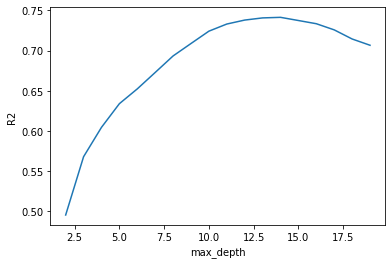

In [137]:
sns.lineplot(x = 'max_depth', y = 'R2', data = result)

## 14에서 R2가 가장 높아서,12로 변경

#### 최적의 하이퍼 파라미터: max_depth: 12

In [138]:
tree_model = DecisionTreeRegressor(max_depth = 12)
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [139]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                filled=True, rounded=True, feature_names = X_train.columns,
                                special_characters=True)

graph = graphviz.Source(dot_data) 
graph

/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52789 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/ba

[Text(631.3732762061014, 784.0384615384615, '임대면적 <= 0.253\nmse = 847374917.194\nsamples = 306695\nvalue = 33157.635'),
 Text(343.2443366996275, 721.3153846153846, '임대면적 <= 0.17\nmse = 262639752.873\nsamples = 237344\nvalue = 23493.329'),
 Text(178.39493448474636, 658.5923076923077, '층 <= 0.063\nmse = 103234467.939\nsamples = 173018\nvalue = 18191.215'),
 Text(90.12880232351897, 595.8692307692307, '임대면적 <= 0.115\nmse = 39303872.666\nsamples = 59033\nvalue = 11732.094'),
 Text(48.20209959205392, 533.1461538461538, '건축년도 <= 0.99\nmse = 25868123.219\nsamples = 43250\nvalue = 10315.484'),
 Text(24.402602873359346, 470.4230769230769, '임대면적 <= 0.081\nmse = 21374156.022\nsamples = 30785\nvalue = 9305.513'),
 Text(12.111608726498758, 407.7, '임대면적 <= 0.041\nmse = 14658864.872\nsamples = 17088\nvalue = 8056.771'),
 Text(6.012504434196523, 344.9769230769231, '건축년도 <= 0.97\nmse = 9066935.529\nsamples = 7173\nvalue = 7135.863'),
 Text(3.1670805250088683, 282.2538461538461, '통화량 <= 0.696\nmse = 9810

/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.

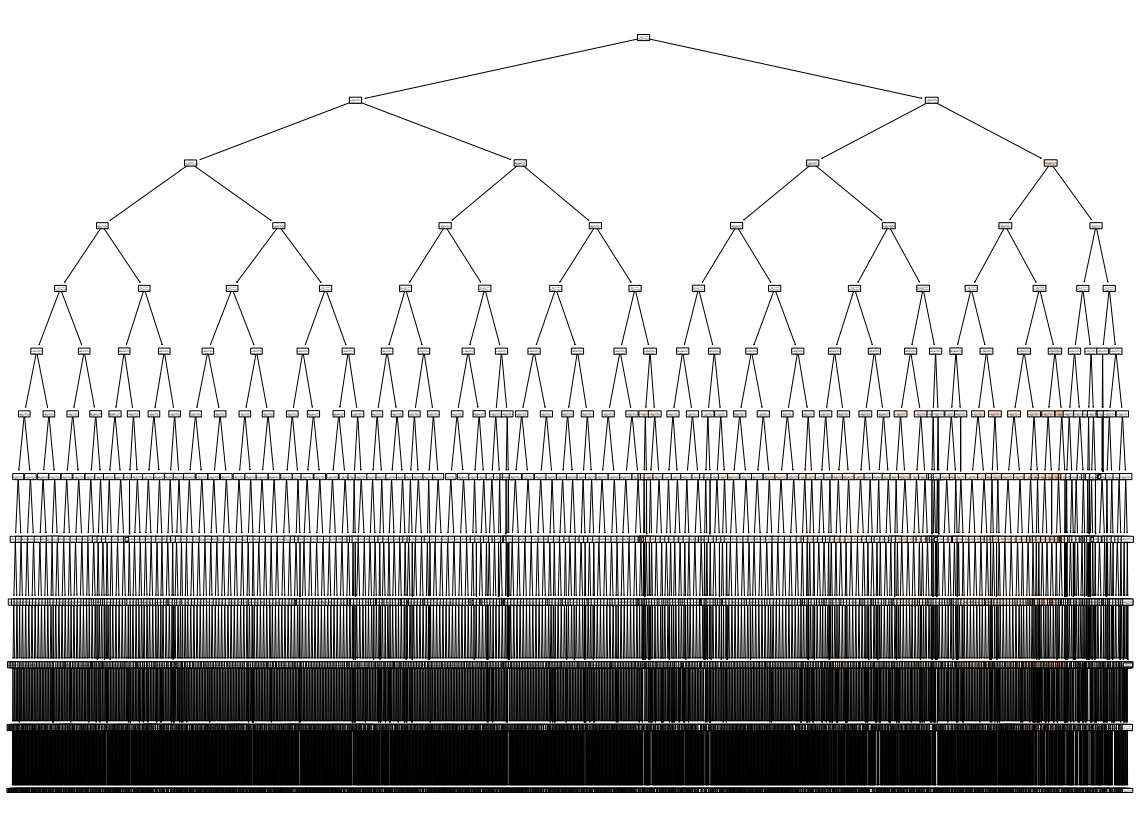

In [140]:
plt.figure(figsize = (20,15))
tree.plot_tree(tree_model, 
               filled=True, rounded=True, feature_names = X_train.columns)


[Text(558.0, 713.475, '임대면적 <= 0.253\nmse = 847374917.194\nsamples = 306695\nvalue = 33157.635'),
 Text(279.0, 509.625, '임대면적 <= 0.17\nmse = 262639752.873\nsamples = 237344\nvalue = 23493.329'),
 Text(139.5, 305.775, '층 <= 0.063\nmse = 103234467.939\nsamples = 173018\nvalue = 18191.215'),
 Text(69.75, 101.92499999999995, '\n  (...)  \n'),
 Text(209.25, 101.92499999999995, '\n  (...)  \n'),
 Text(418.5, 305.775, '임대건물명_아파트 <= 0.5\nmse = 412399191.767\nsamples = 64326\nvalue = 37754.456'),
 Text(348.75, 101.92499999999995, '\n  (...)  \n'),
 Text(488.25, 101.92499999999995, '\n  (...)  \n'),
 Text(837.0, 509.625, '임대면적 <= 0.379\nmse = 1434967161.336\nsamples = 69351\nvalue = 66232.354'),
 Text(697.5, 305.775, '건축년도 <= 0.988\nmse = 877788305.617\nsamples = 59924\nvalue = 60924.955'),
 Text(627.75, 101.92499999999995, '\n  (...)  \n'),
 Text(767.25, 101.92499999999995, '\n  (...)  \n'),
 Text(976.5, 305.775, '임대건물명_단독/다가구 <= 0.5\nmse = 3659494286.533\nsamples = 9427\nvalue = 99969.556'),
 

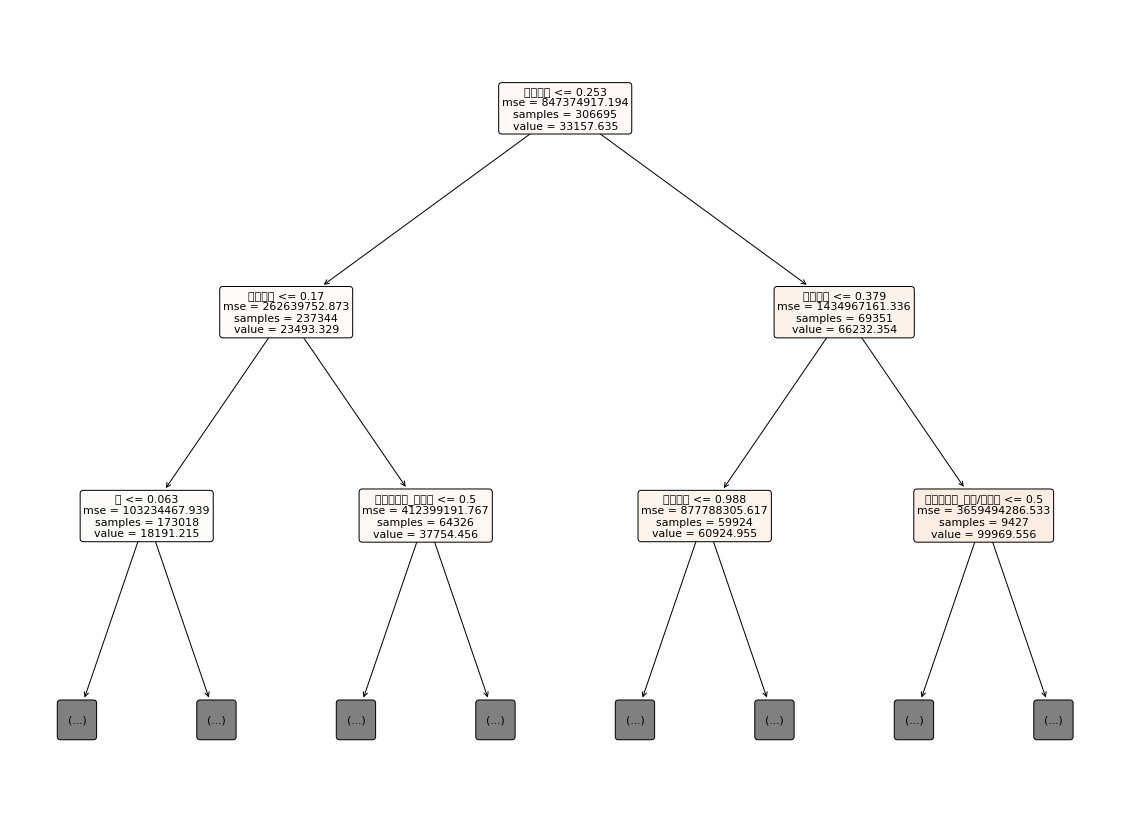

In [141]:
plt.figure(figsize = (20,15))
tree.plot_tree(tree_model, max_depth = 2,
               filled=True, rounded=True, feature_names = X_train.columns)


[Text(558.0, 733.86, '임대면적 <= 0.253\nmse = 847374917.194\nsamples = 306695\nvalue = 33157.635'),
 Text(279.0, 570.78, '임대면적 <= 0.17\nmse = 262639752.873\nsamples = 237344\nvalue = 23493.329'),
 Text(139.5, 407.70000000000005, '층 <= 0.063\nmse = 103234467.939\nsamples = 173018\nvalue = 18191.215'),
 Text(69.75, 244.62, '임대면적 <= 0.115\nmse = 39303872.666\nsamples = 59033\nvalue = 11732.094'),
 Text(34.875, 81.54000000000008, '\n  (...)  \n'),
 Text(104.625, 81.54000000000008, '\n  (...)  \n'),
 Text(209.25, 244.62, '임대면적 <= 0.051\nmse = 103546953.129\nsamples = 113985\nvalue = 21536.404'),
 Text(174.375, 81.54000000000008, '\n  (...)  \n'),
 Text(244.125, 81.54000000000008, '\n  (...)  \n'),
 Text(418.5, 407.70000000000005, '임대건물명_아파트 <= 0.5\nmse = 412399191.767\nsamples = 64326\nvalue = 37754.456'),
 Text(348.75, 244.62, '건축년도 <= 0.976\nmse = 126762185.135\nsamples = 19761\nvalue = 23736.242'),
 Text(313.875, 81.54000000000008, '\n  (...)  \n'),
 Text(383.625, 81.54000000000008, '\n  (.

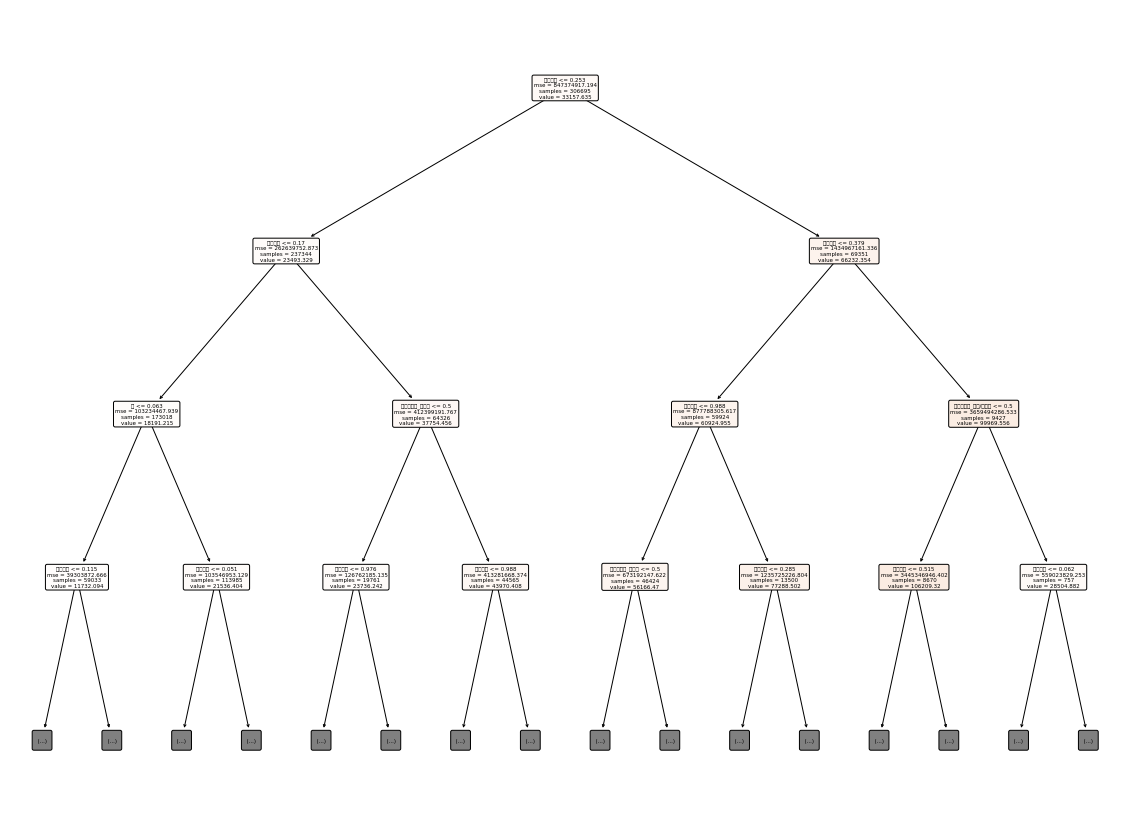

In [142]:
plt.figure(figsize = (20,15))
tree.plot_tree(tree_model, max_depth = 3,
               filled=True, rounded=True, feature_names = X_train.columns)


#### 성능 평가

In [143]:
predicted = tree_model.predict(X_test)
print("MAPE: {}".format(MAPE(y_test, predicted)))
print("MAE: {}".format(mean_absolute_error(y_test, predicted)))
print("MSE: {}".format(mean_squared_error(y_test, predicted)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, predicted))))
print("R2 score: {}".format(r2_score(y_test, predicted)))

MAPE: 35.328334349927985
MAE: 8732.29484563396
MSE: 219903499.02167955
RMSE: 14829.143570067678
R2 score: 0.7374990116497588


### (2) Random Forest

- 하이퍼 파라미터 조정: n_estimators(100, 200, 300), max_depth(5, 7, 9)

In [145]:
n_estimators_candidate = [100, 200, 300]
max_depth_candidate = [5, 7, 9]

n_estimators_list = []
max_depth_list = []
r2_score_list = []

for n_estimators in tqdm.tqdm_notebook(n_estimators_candidate):
    for max_depth in max_depth_candidate:
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                      random_state = 1004).fit(X_train, y_train)
        test_predict_rf = model.predict(X_test)
        r2_score_list.append(r2_score(y_test, test_predict_rf))
        n_estimators_list.append(n_estimators)
        max_depth_list.append(max_depth)
            
result = pd.DataFrame({"n_estimators": n_estimators_list, "max_depth": max_depth_list, "R2": r2_score_list})
result          

/Users/son/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,n_estimators,max_depth,R2
0,100,5,0.642068
1,100,7,0.685462
2,100,9,0.726091
3,200,5,0.642035
4,200,7,0.685785
5,200,9,0.726529
6,300,5,0.642005
7,300,7,0.685682
8,300,9,0.726555


In [146]:
result.loc[result['R2'] == max(result['R2']), :]

,n_estimators,max_depth,R2
8,300,9,0.726555


#### - 최적의 하이퍼 파라미터: n_estimators = 300, max_depth = 9

In [147]:
model = RandomForestRegressor(n_estimators=300, max_depth=9,random_state = 1004).fit(X_train, y_train)
predicted = model.predict(X_test)
print("MAPE: {}".format(MAPE(y_test, predicted)))
print("MAE: {}".format(mean_absolute_error(y_test, predicted)))
print("MSE: {}".format(mean_squared_error(y_test, predicted)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, predicted))))
print("R2 score: {}".format(r2_score(y_test, predicted)))

MAPE: 38.729371919885445
MAE: 9197.937915549432
MSE: 229071747.67741486
RMSE: 15135.116374756253
R2 score: 0.7265547822751548


#### - 변수중요도

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/son/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/ba

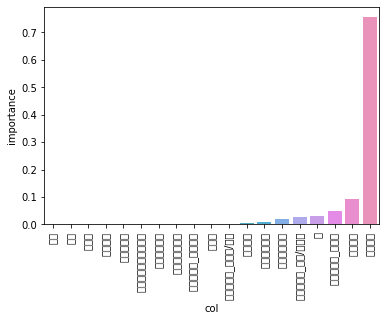

In [155]:
importance = pd.DataFrame({'col' : X_train.columns, 
                           'importance' : model.feature_importances_})
sns.barplot(data = importance.sort_values('importance'), x = 'col', y = 'importance')
plt.xticks(rotation = 90)

In [156]:
importance

,col,importance
0,층,0.031732
1,임대면적,0.755072
2,건축년도,0.091660
3,경제활동인구,0.009867
4,기준금리,0.006647
5,전세가격비율,0.019606
6,정책성향,0.000396
7,아파트매매실거래지수,0.000915
8,회사채수익률,0.001468
9,소비자물가지수,0.001521
